In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('./stations_encoded.csv')
df.columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.columns)  
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['PM2.5']].sort_values(by='PM2.5', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with PM2.5')
plt.show()
df.drop(columns=['road_distance','river_distance','industry_distance'],inplace=True)

In [ ]:
X = df.drop(columns=['PM2.5',''])
y = np.log1p(df['PM2.5']) 
print(y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = X.select_dtypes(include='number').columns
categorical_X = X.drop(columns=numeric_columns)
categorical_columns = X.drop(columns=numeric_columns)
scaled_array  = scaler.fit_transform(X[numeric_columns])
scaled_numeric_X = pd.DataFrame(scaled_array, columns=numeric_columns, index=X.index)

df = pd.concat([categorical_X,scaled_numeric_X],axis=1)
print(y)

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print metrics
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print("PM2.5 mean:", y.mean())
print("PM2.5 std deviation:", y.std())

# Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient']
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\nTop features by absolute coefficient value:")
print(coef_df[['Feature', 'Coefficient']])  # show top 10


R² Score: 0.7359
RMSE: 0.4336
MAE: 0.3187
PM2.5 mean: 4.047908509200789
PM2.5 std deviation: 0.8463524162507189

Top features by absolute coefficient value:
                    Feature  Coefficient
39            Season_Winter     0.408819
31             City_Lucknow     0.344726
33               City_Patna     0.288360
24            City_Gurugram     0.244834
18        City_Brajrajnagar     0.081466
37       City_Visakhapatnam     0.070080
25            City_Guwahati     0.041200
38            Season_Summer     0.022336
28          City_Jorapokhar     0.015452
22               City_Delhi     0.012760
0                      PM10     0.003084
4                       NH3     0.001658
2                       NO2     0.001616
5                        CO     0.001476
7                        O3     0.001044
6                       SO2     0.000430
3                       NOx     0.000280
9                   Toluene     0.000168
8                   Benzene     0.000033
1                      

In [ ]:
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# import pandas as pd

# # -------------------- Data --------------------
# features = df.columns.drop('PM2.5')
# x = df[features]
# y = df['PM2.5']

# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# # -------------------- Decision Tree --------------------
# dt_params = {
#     'max_depth': [5, 10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# dt_search = RandomizedSearchCV(
#     DecisionTreeRegressor(random_state=42),
#     dt_params,
#     n_iter=10,
#     cv=3,
#     scoring='r2',
#     n_jobs=-1,
#     verbose=1,
#     random_state=42
# )
# dt_search.fit(xtrain, ytrain)
# dt_best = dt_search.best_estimator_
# dt_pred = dt_best.predict(xtest)

# print("\nBest Decision Tree Parameters:", dt_search.best_params_)
# print("Decision Tree R²:", r2_score(ytest, dt_pred))
# print("Decision Tree RMSE:", np.sqrt(mean_squared_error(ytest, dt_pred)))

# # -------------------- Random Forest --------------------
# rf_params = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2']
# }

# rf_search = RandomizedSearchCV(
#     RandomForestRegressor(random_state=42),
#     rf_params,
#     n_iter=10,
#     cv=3,
#     scoring='r2',
#     n_jobs=-1,
#     verbose=1,
#     random_state=42
# )
# rf_search.fit(xtrain, ytrain)
# rf_best = rf_search.best_estimator_
# rf_pred = rf_best.predict(xtest)

# print("\nBest Random Forest Parameters:", rf_search.best_params_)
# print("Random Forest R²:", r2_score(ytest, rf_pred))
# print("Random Forest RMSE:", np.sqrt(mean_squared_error(ytest, rf_pred)))

# # -------------------- Gradient Boosting --------------------
# gb_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2']
# }

# gb_search = RandomizedSearchCV(
#     GradientBoostingRegressor(random_state=42),
#     gb_params,
#     n_iter=10,
#     cv=3,
#     scoring='r2',
#     n_jobs=-1,
#     verbose=1,
#     random_state=42
# )
# gb_search.fit(xtrain, ytrain)
# gb_best = gb_search.best_estimator_
# gb_pred = gb_best.predict(xtest)

# print("\nBest Gradient Boosting Parameters:", gb_search.best_params_)
# print("Gradient Boosting R²:", r2_score(ytest, gb_pred))
# print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(ytest, gb_pred)))


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- XGBoost --------------------
xgb = XGBRegressor(random_state=42, n_jobs=-1)
xgb_params = {
    'n_estimators': [100, 200,300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}
xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=10, cv=3, scoring='r2', verbose=1, n_jobs=-1)
xgb_search.fit(xtrain, ytrain)

xgb_best = xgb_search.best_estimator_
xgb_pred = xgb_best.predict(xtest)
print("\nXGBoost R²:", r2_score(ytest, xgb_pred))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(ytest, xgb_pred)))

# -------------------- LightGBM --------------------
lgb = LGBMRegressor(random_state=42, n_jobs=-1)
lgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}
lgb_search = RandomizedSearchCV(lgb, lgb_params, n_iter=10, cv=3, scoring='r2', verbose=1, n_jobs=-1)
lgb_search.fit(xtrain, ytrain)

lgb_best = lgb_search.best_estimator_
lgb_pred = lgb_best.predict(xtest)
print("\nLightGBM R²:", r2_score(ytest, lgb_pred))
print("LightGBM RMSE:", np.sqrt(mean_squared_error(ytest, lgb_pred)))


Fitting 3 folds for each of 10 candidates, totalling 30 fits

XGBoost R²: 0.8652014235700314
XGBoost RMSE: 0.30980603629137643
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3369
[LightGBM] [Info] Number of data points in the train set: 69128, number of used features: 40
[LightGBM] [Info] Start training from score 4.047923

LightGBM R²: 0.8621916217013927
LightGBM RMSE: 0.3132456390159856


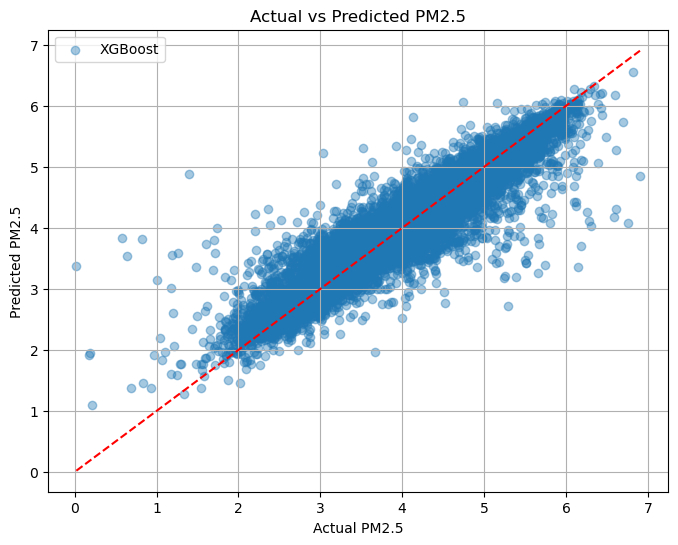

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(ytest, xgb_pred, alpha=0.4, label='XGBoost')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Actual vs Predicted PM2.5")
plt.legend()
plt.grid(True)
plt.show()
